In [1]:
%load_ext autoreload
%autoreload 2

# Defining your own custom loaders

In [2]:
import pathlib

import numpy as np
import pandas as pd
from rich import print

import cellpy
from cellpy.utils import example_data, plotutils

In [3]:
# Comment out this when running the notebook locally to get interactive plots
import plotly.io as pio
pio.renderers.default = "png"

Defining a simple utility-function to get a peek of the file in question:

In [50]:
def head(f, n=5):
    print(f" {f.name} ".center(80, "="))
    with open(f) as datafile:
        if n > 1:
            for j in range(n):
                line = datafile.readline()
                print(f"[{j+1:02}] {line.rstrip()}")
        else:
            for j, line in enumerate(datafile.readlines()):
                print(f"[{j+1:02}] {line.rstrip()}")
    print(f" {f.name} ".center(80, "="))
            
        

## Using the "custom" instrument

- custom.py
- can load csv, xls, xlsx
- need to check how it parses the instrument.yml file!
- need to create xlsx example file

In [51]:
f = pathlib.Path(r"C:\scripting\cellpy\testdata\data\custom_data_001.csv")
instrument_file = pathlib.Path(r"C:\scripting\cellpy\testdata\data\custom_instrument_001.yml")

In [52]:
head(f, 30)

============================= custom_data_001.csv ==============================

[01] # PRIME INSTRUMENT FILE --- M12X---!! HEAD !!---M13B---;;;;;;;;;

[02] number of headers ;19;;;;;;;;

[03] operator;Jan Petter Maehlen;;;;;;;;

[04] date;01.01.2016;;;;;;;;

[05] instrument;bobby;;;;;;;;

[06] schedule;galvanic;;;;;;;;

[07] cell;ee002;;;;;;;;

[08] geometry;half-cell;;;;;;;;

[09] counter;Li-metal;;;;;;;;

[10] material;si-based;;;;;;;;

[11] mass;0.0012;;;;;;;;

[12] # PRIME INSTRUMENT FILE ---L01---''LOG'' ---0000000-;;;;;;;;;

[13] 15;Started collecting auxilary data (saved to output.log);;;;;;;;

[14] 773;Problem encountered - reloading config;;;;;;;;

[15] 1111;R12;;;;;;;;

[16] 6588;R12;;;;;;;;

[17] 7712;Problem encountered - reloading config;;;;;;;;

[18] 78999;R0;;;;;;;;

[19] # PRIME INSTRUMENT FILE ---268876-;;;;;;;;;

[20] index;test_time;step_time;date_stamp;step;cycle;current;voltage;charge_capacity;discharge_Capacity

[21] 0;120.00;120.00;43374.42;1;1;0.00;1.14;0.00;0.00

[22] 1;240.00;240.00;43374.42;1;1;0.00;1.14;0.00;0.00

[23] 2;360.00;360.00;43374.42;1;1;0.00;1.14;0.00;0.00

[24] 3;480.00;480.00;43374.42;1;1;0.00;1.14;0.00;0.00

[25] 4;600.01;600.01;43374.42;1;1;0.00;1.14;0.00;0.00

[26] 5;720.01;720.01;43374.42;1;1;0.00;1.14;0.00;0.00

[27] 6;840.01;840.01;43374.42;1;1;0.00;1.14;0.00;0.00

[28] 7;960.01;960.01;43374.43;1;1;0.00;1.14;0.00;0.00

[29] 8;1080.01;1080.01;43374.43;1;1;0.00;1.14;0.00;0.00

[30] 9;1200.01;1200.01;43374.43;1;1;0.00;1.14;0.00;0.00

============================= custom_data_001.csv ==============================

In [53]:
head(instrument_file, -1)

========================== custom_instrument_001.yml ===========================

[01] ---

[02] formatters:

[03]     skiprows: 19

[04]     sep: ";"

[05]     header: 0

[06]     encoding: ISO-8859-1  # options: ISO-8859-1 utf-8 cp1252

[07]     decimal: .

[08]     thousands:

[09]     comment_chars:

[10]         - '#'

[11]         - '!'

[12] post_processors:

[13]     split_capacity: false

[14]     split_current: false

[15]     set_index: false

[16]     rename_headers: true

[17]     set_cycle_number_not_zero: false

[18]     convert_date_time_to_datetime: true

[19]     convert_step_time_to_timedelta: false

[20]     convert_test_time_to_timedelta: false

[21] normal_headers_renaming_dict:

[22]     data_point_txt: "index"

[23]     datetime_txt: "date_stamp"

[24]     test_time_txt: "test_time"

[25]     step_time_txt: "step_time"

[26]     cycle_index_txt: "cycle"

[27]     step_index_txt: "step"

[28]     current_txt: "current"

[29]     voltage_txt: "voltage"

[30]     charge_capacity_txt: "charge_capacity"

[31]     discharge_capacity_txt: "discharge_Capacity"

[32] unit_labels:

[33]     resistance: Ohms

[34]     time: s

[35]     current: mA

[36]     voltage: V

[37]     power: W

[38]     capacity: mAh

[39]     energy: Wh

[40]     temperature: C

[41] raw_units:

[42]     current: A

[43]     charge: Ah

[44]     mass: mg

[45]     time: s

[46] raw_limits:

[47]     current_hard: 1.0e-13

[48]     current_soft: 1.0e-05

[49]     ir_change: 1.0e-05

[50]     stable_charge_hard: 0.9

[51]     stable_charge_soft: 5.0

[52]     stable_current_hard: 2.0

[53]     stable_current_soft: 4.0

[54]     stable_voltage_hard: 2.0

[55]     stable_voltage_soft: 4.0

========================== custom_instrument_001.yml ===========================

In [54]:
c = cellpy.get(f, instrument="custom", instrument_file=instrument_file)

(cellpy) - self.sep=';', self.skiprows=19, self.header=0, self.encoding='ISO-8859-1', self.decimal='.'
(cellpy) - running post-processor: rename_headers
(cellpy) - running post-processor: convert_date_time_to_datetime


## Using the "local_instrument" loader

- local_instrument.py
- can only load csv
- parses the instrument.yml file as using the same mechanism as models (maccor_txt, etc)
- need to create a couple of other examples (maybe failing examples also?)
- the loader is automatically chosen if setting `instrument="instrumentfile.yml"` in `cellpy.get`

In [55]:
i2 = r"C:\scripting\cellpy\testdata\instruments\maccor_one.yml"
f2 = r"C:\scripting\cellpy\testdata\data\maccor_001.txt"

In [56]:
head(pathlib.Path(i2), 40)

================================ maccor_one.yml ================================

[01] ---

[02] formatters:

[03]     skiprows: 3  # 12 for other file

[04]     sep: "\t"

[05]     header: 0  # 0 for other file

[06]     encoding: ISO-8859-1  # options: ISO-8859-1 utf-8 cp1252

[07]     decimal: .

[08]     thousands:

[09]     comment_chars:

[10]         - '#'

[11]         - '!'

[12] post_processors:

[13]     split_capacity: true

[14]     split_current: true

[15]     set_index: true

[16]     rename_headers: true

[17]     set_cycle_number_not_zero: true

[18]     convert_date_time_to_datetime: true

[19]     convert_step_time_to_timedelta: true

[20]     convert_test_time_to_timedelta: true

[21] normal_headers_renaming_dict:

[22]     data_point_txt: "Rec#"

[23]     datetime_txt: "DPt Time"

[24]     test_time_txt: "TestTime"

[25]     step_time_txt: "StepTime"

[26]     cycle_index_txt: "Cyc#"

[27]     step_index_txt: "Step"

[28]     current_txt: "Amps"

[29]     voltage_txt: "Volts"

[30]     power_txt: "Watt-hr"

[31]     charge_capacity_txt: "Amp-hr"

[32]     charge_energy_txt: "Watt-hr"

[33]     ac_impedance_txt: "ACImp/Ohms"

[34]     internal_resistance_txt: "DCIR/Ohms"

[35] unit_labels:

[36]     resistance: Ohms

[37]     time: s

[38]     current: A

[39]     voltage: V

[40]     power: W

================================ maccor_one.yml ================================

In [48]:
c = cellpy.get(f2, instrument=i2)

(cellpy) - self.sep='\t', self.skiprows=3, self.header=0, self.encoding='ISO-8859-1', self.decimal='.'
(cellpy) - running post-processor: rename_headers
(cellpy) - running post-processor: split_capacity
(cellpy) - running post-processor: split_current
(cellpy) - running post-processor: set_index
(cellpy) - running post-processor: set_cycle_number_not_zero
(cellpy) - running post-processor: convert_date_time_to_datetime
(cellpy) - running post-processor: convert_step_time_to_timedelta
(cellpy) - running post-processor: convert_test_time_to_timedelta


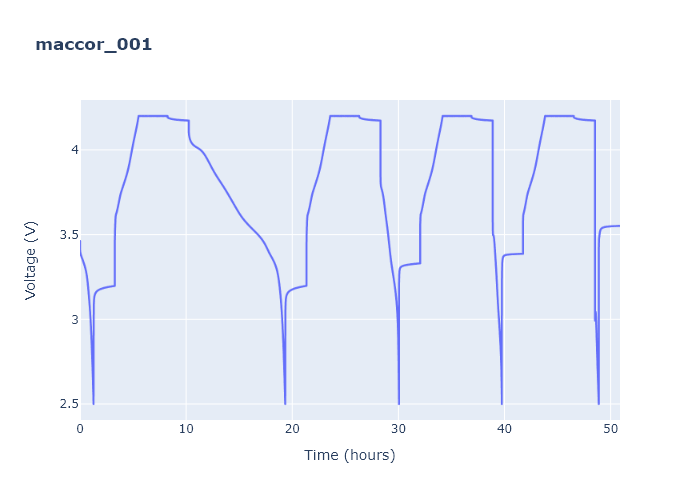

In [49]:
plotutils.raw_plot(c)

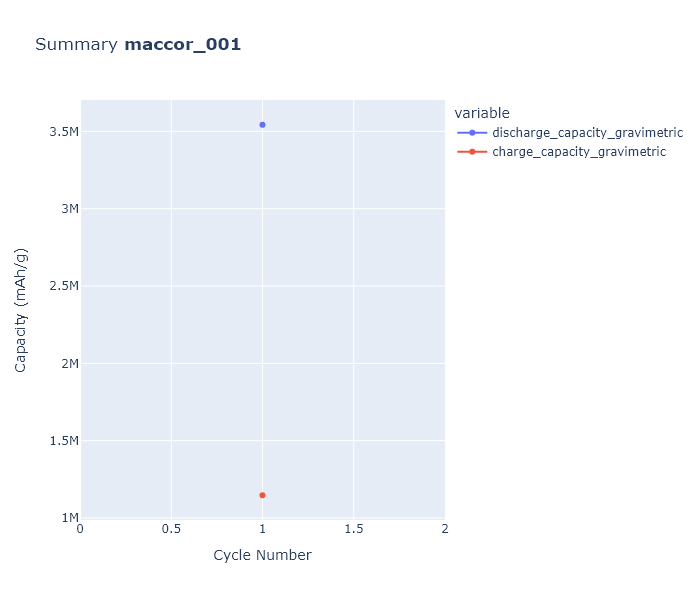

In [43]:
plotutils.summary_plot(c)